# 주제 : <br>우리 애는 머리는 좋은데, 공부를 안해서 그래요 - 데이터로 살펴보는 우리 아이 학습 성공/실패 요소
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 xAPI-Edu-Data 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    xAPI-Edu-Data.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

## 최종 목표
    - 연구용 Tabular 데이터의 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Logistic Regression, XGBoost 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 연구용 데이터의 목적
    - 연구용 데이터 : 목적을 갖고 만들어진 데이터
    

### 연구용 데이터의 인용


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kimhagdori'
os.environ['KAGGLE_KEY'] = '5f09cbd68873b51cb127ca6c2daa552d'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

# !kaggle datasets download -d aljarah/xAPI-Edu-Data
# !unzip '*.zip'

In [5]:
### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기
df = pd.read_csv('./xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [6]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())

print(f'데이터 확인\n{df.head()}\n')
print(f'데이터 정보\n{df.info()}\n')
print(f'데이터 기초통계량 확인{df.describe()}')

데이터 확인
  gender NationalITy PlaceofBirth     StageID GradeID SectionID Topic  \
0      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
1      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
2      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
3      M          KW       KuwaIT  lowerlevel    G-04         A    IT   
4      M          KW       KuwaIT  lowerlevel    G-04         A    IT   

  Semester Relation  raisedhands  VisITedResources  AnnouncementsView  \
0        F   Father           15                16                  2   
1        F   Father           20                20                  3   
2        F   Father           10                 7                  0   
3        F   Father           30                25                  5   
4        F   Father           40                50                 12   

   Discussion ParentAnsweringSurvey ParentschoolSatisfaction  \
0          20                   Yes                

In [14]:
df.NationalITy.value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
Lybia            6
USA              6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

In [15]:
df.PlaceofBirth.value_counts()

KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Lybia            6
Syria            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64

In [16]:
df.StageID.value_counts()

MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64

### 문제 5. 수치형 데이터의 히스토그램 그리기


In [6]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

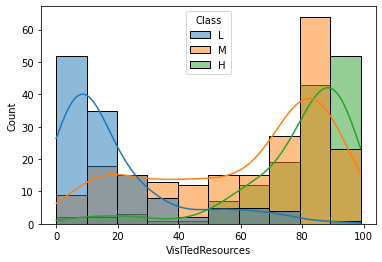

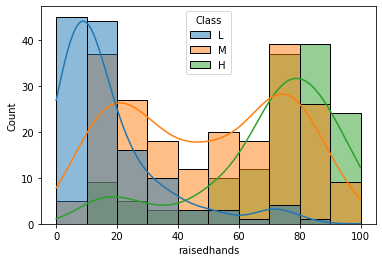

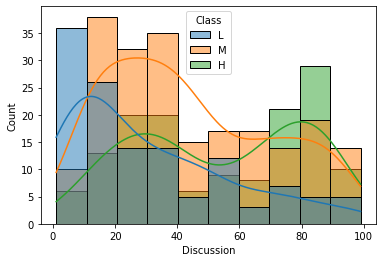

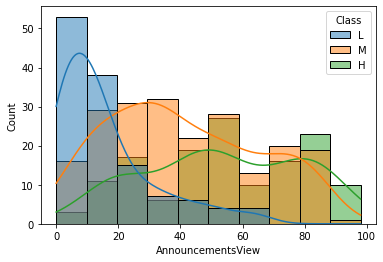

In [24]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기

# 성별 Class
sns.histplot(x='VisITedResources', hue='Class', data=df, kde=True, hue_order=['L', 'M', 'H'])
plt.show()

# 손 든 횟수별 Class 
# 가장 많은 영향을 주는 걸로 보여짐
sns.histplot(x='raisedhands', hue='Class', data=df, hue_order=['L', 'M', 'H'], kde=True)
plt.show()

# 토론 참여 수별 Class
sns.histplot(x='Discussion', data=df, hue='Class', hue_order=['L', 'M', 'H'], kde=True)
plt.show()

# 공지 확인 수
sns.histplot(x='AnnouncementsView', hue='Class', data=df, kde=True, hue_order=['L', 'M', 'H'])
plt.show()

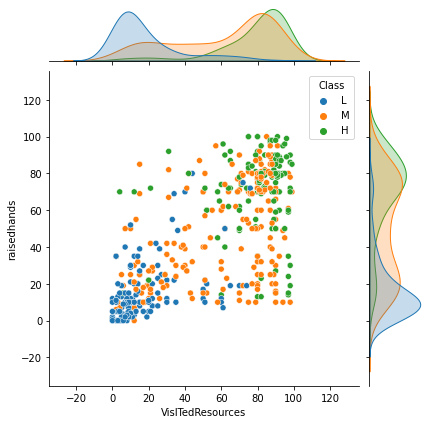

In [27]:
sns.jointplot(x='VisITedResources', y='raisedhands', hue='Class', hue_order=['L', 'M', 'H'], data=df)

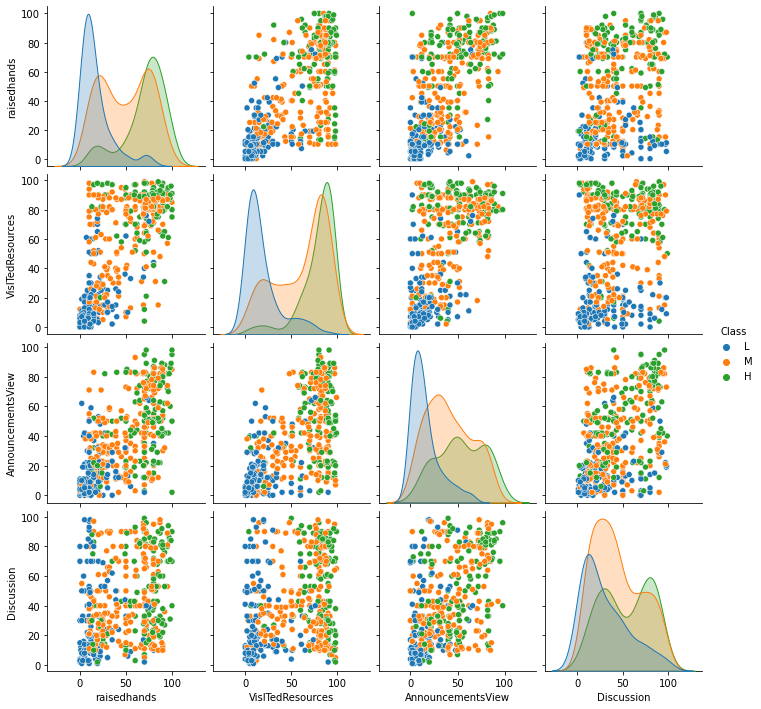

In [29]:
sns.pairplot(df, hue='Class', hue_order=['L', 'M', 'H'])

### 문제 6. Countplot을 이용하여 범주별 통계 확인하기


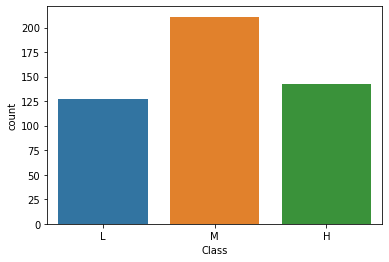

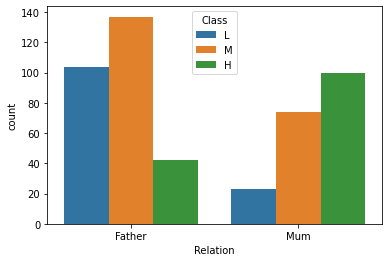

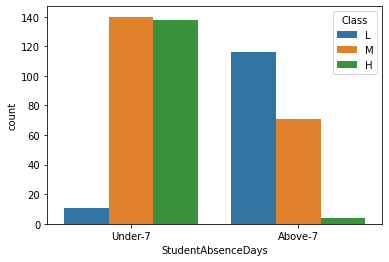

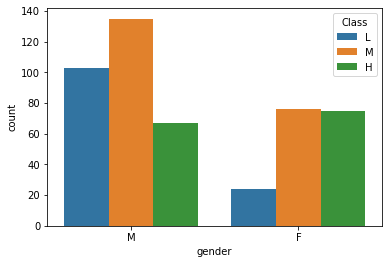

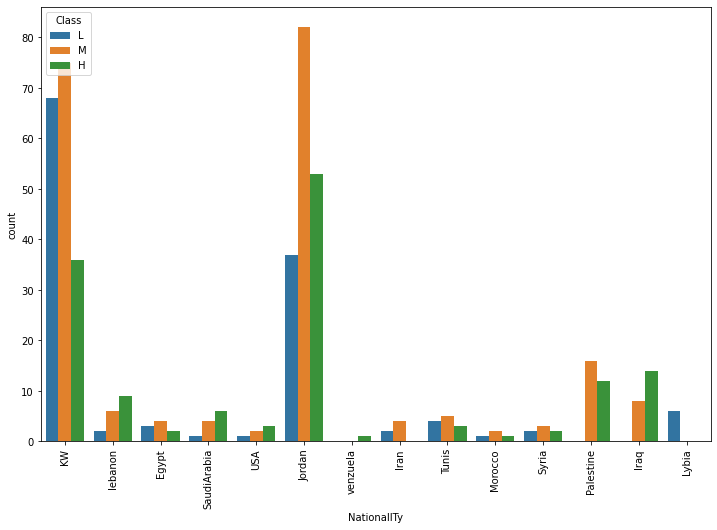

In [35]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 통계 확인


sns.countplot(x='Class', data=df, order=['L', 'M', 'H'])
plt.show()

# 주보호자 - Class
sns.countplot(x='Relation', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.show()

# 결석일 - Class
sns.countplot(x='StudentAbsenceDays', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.show()

## 성별 - Class
sns.countplot(x='gender', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.show()


# 국적 - CLass
plt.figure(figsize=(12, 8))
sns.countplot(x='NationalITy', data=df, hue='Class', hue_order=['L','M', 'H'])
plt.xticks(rotation=90)
plt.show()

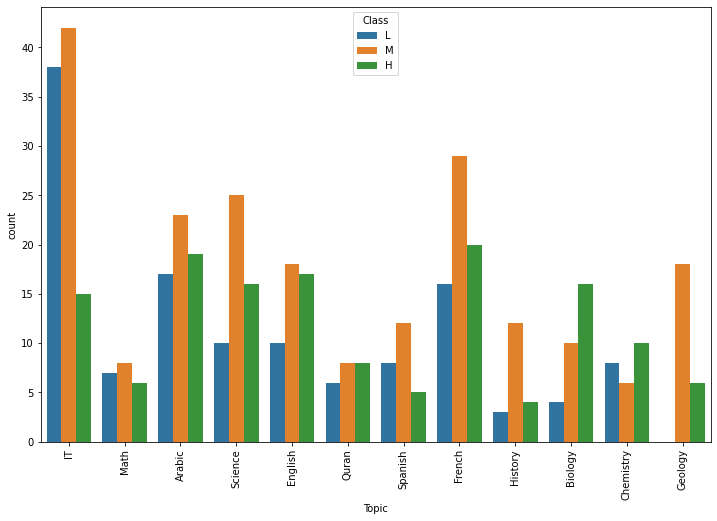

In [37]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Topic', data=df, hue='Class', hue_order=['L', 'M', 'H'])
plt.xticks(rotation=90)
plt.show()

### 문제 7. 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [25]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [50]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용

categorical_variables = ['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID', 'SectionID', 'Semester',
                        'Relation','Topic', 'ParentAnsweringSurvey', 'StudentAbsenceDays',]

df['Class_value'] = df['Class'].map({'L':-1,
                                    'M':0,
                                    'H':1})

df['Class_value'][:5]


0    0
1    0
2   -1
3   -1
4    0
Name: Class_value, dtype: int64

성별 : gender
F    0.291429
M   -0.118033
Name: Class_value, dtype: float64


<BarContainer object of 2 artists>

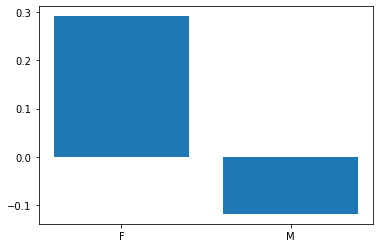

In [51]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기

df_gender = df.groupby('gender').mean()['Class_value']
print(f'성별 : {df_gender}')
plt.bar(df_gender.index, df_gender.values)

과목 : Topic
IT          -0.242105
Spanish     -0.120000
Math        -0.047619
Arabic       0.033898
History      0.052632
French       0.061538
Chemistry    0.083333
Quran        0.090909
Science      0.117647
English      0.155556
Geology      0.250000
Biology      0.400000
Name: Class_value, dtype: float64


<BarContainer object of 12 artists>

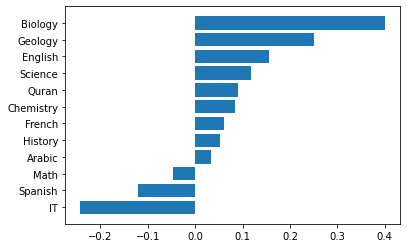

In [52]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기

df_topic = df.groupby('Topic').mean()['Class_value'].sort_values()
print(f'과목 : {df_topic}')
plt.barh(df_topic.index, df_topic.values)


과목 : StudentAbsenceDays
Above-7   -0.586387
Under-7    0.439446
Name: Class_value, dtype: float64


<BarContainer object of 2 artists>

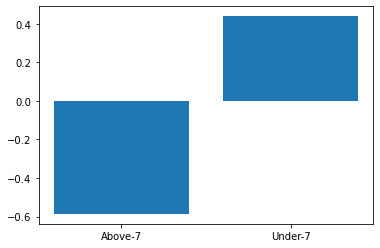

In [53]:
df_absent = df.groupby('StudentAbsenceDays').mean()['Class_value'].sort_values()
print(f'과목 : {df_absent}')
plt.bar(df_absent.index, df_absent.values)


## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 8. get_dummies()를 이용하여 범주형 데이터 전처리하기


In [54]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


In [78]:
## 수치형 변수 / 카테고리형 변수

cols= set(df.columns)
cols = cols.difference(set(categorical_variables))
cols.remove('Class')
cols.remove('Class_value')
cols.remove('ParentschoolSatisfaction')

{'AnnouncementsView', 'Discussion', 'VisITedResources', 'raisedhands'}

In [82]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_dummies = pd.get_dummies(df, columns=categorical_variables, drop_first=True)
X_dummies.drop(cols, axis=1, inplace=True)

X_numerical = df[list(cols)]
X_numerical = pd.DataFrame(scaler.fit_transform(X_numerical), columns=X_numerical.columns)


X = pd.concat([X_numerical, X_dummies], axis=1)
y = df['Class']

X.drop(['Class', 'Class_value', 'ParentschoolSatisfaction'], axis=1, inplace=True)
display(X.columns)
display(X.head())

Index(['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion',
       'gender_M', 'NationalITy_Iran', 'NationalITy_Iraq',
       'NationalITy_Jordan', 'NationalITy_KW', 'NationalITy_Lybia',
       'NationalITy_Morocco', 'NationalITy_Palestine',
       'NationalITy_SaudiArabia', 'NationalITy_Syria', 'NationalITy_Tunis',
       'NationalITy_USA', 'NationalITy_lebanon', 'NationalITy_venzuela',
       'PlaceofBirth_Iran', 'PlaceofBirth_Iraq', 'PlaceofBirth_Jordan',
       'PlaceofBirth_KuwaIT', 'PlaceofBirth_Lybia', 'PlaceofBirth_Morocco',
       'PlaceofBirth_Palestine', 'PlaceofBirth_SaudiArabia',
       'PlaceofBirth_Syria', 'PlaceofBirth_Tunis', 'PlaceofBirth_USA',
       'PlaceofBirth_lebanon', 'PlaceofBirth_venzuela', 'StageID_MiddleSchool',
       'StageID_lowerlevel', 'GradeID_G-04', 'GradeID_G-05', 'GradeID_G-06',
       'GradeID_G-07', 'GradeID_G-08', 'GradeID_G-09', 'GradeID_G-10',
       'GradeID_G-11', 'GradeID_G-12', 'SectionID_B', 'SectionID_C',
       'Semeste

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,-1.033429,-1.174075,-1.351167,-0.843326,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
1,-0.870813,-1.053029,-1.313549,-0.662225,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,1
2,-1.196046,-1.446426,-1.426401,-0.481125,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,-0.545579,-0.901723,-1.238315,-0.300024,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,-0.220346,-0.145191,-0.974994,0.243279,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


### 문제 9. 학습데이터와 테스트데이터 분리하기


In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(f'X_Train : {X_train.shape}')
print(f'X_Test : {X_test.shape}')

X_Train : (336, 59)
X_Test : (144, 59)


## Step 4. Classification 모델 학습하기


### 문제 10. Logistic Regression 모델 생성/학습하기


In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression()

model_lr.fit(X_train, y_train)

LogisticRegression()

### 문제 11. 모델 학습 결과 평가하기


In [87]:
from sklearn.metrics import classification_report

In [88]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.78      0.74      0.76        43
           L       0.88      0.86      0.87        43
           M       0.72      0.76      0.74        58

    accuracy                           0.78       144
   macro avg       0.79      0.79      0.79       144
weighted avg       0.79      0.78      0.79       144



### 문제 12. XGBoost 모델 생성/학습하기


In [89]:
from xgboost import XGBClassifier

In [90]:
y_train_zot = y_train.map({'L' : 0, 'M' : 1, 'H':2})
y_test_zot = y_test.map({'L' : 0, 'M' : 1, 'H':2})

In [91]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()


model_xgb.fit(X_train, y_train_zot)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

### 문제 13. 모델 학습 결과 평가하기


In [92]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)

print(classification_report(y_test_zot, pred))


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.74      0.74      0.74        58
           2       0.77      0.77      0.77        43

    accuracy                           0.78       144
   macro avg       0.79      0.79      0.79       144
weighted avg       0.78      0.78      0.78       144



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Logistic Regression 모델 계수로 상관성 파악하기

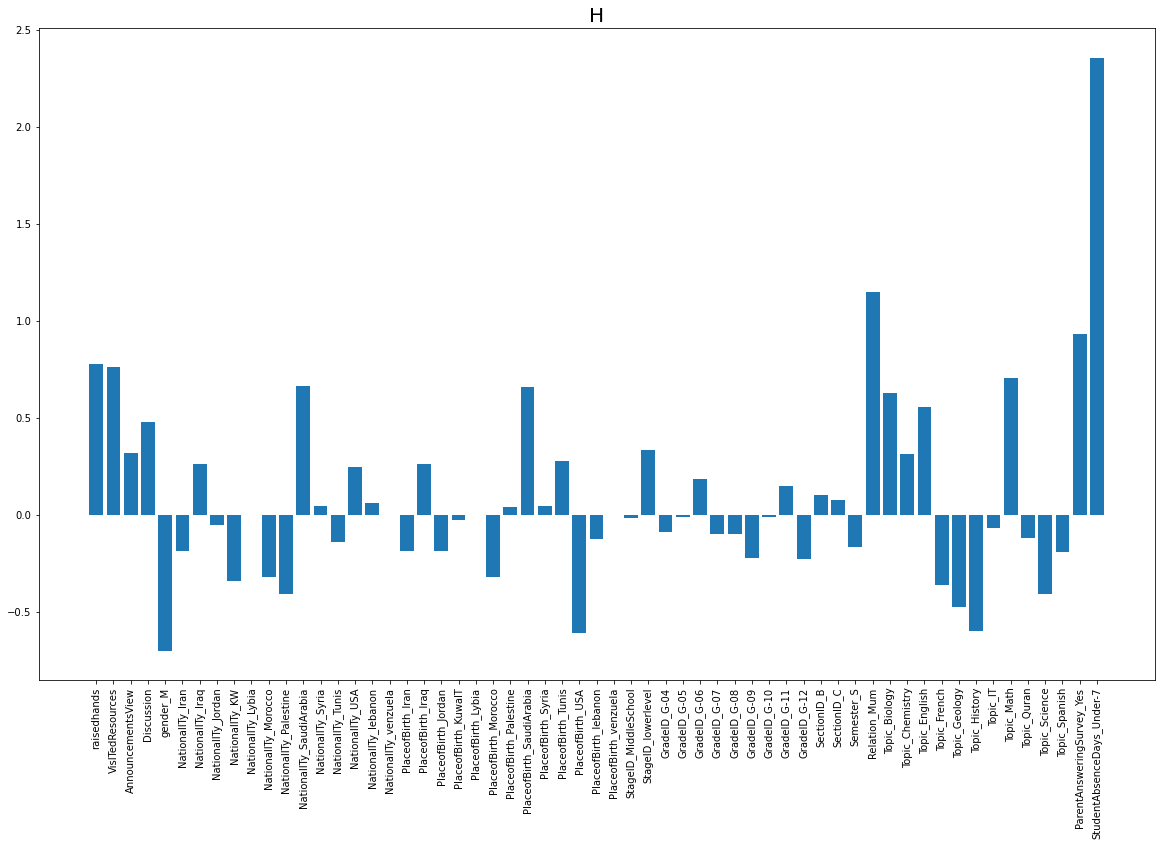

In [105]:
plt.figure(figsize=(20, 12))
plt.bar(X.columns, model_lr.coef_[0])
plt.title(model_lr.classes_[0], fontdict={'fontsize' : 20})
plt.xticks(rotation=90)
plt.show()



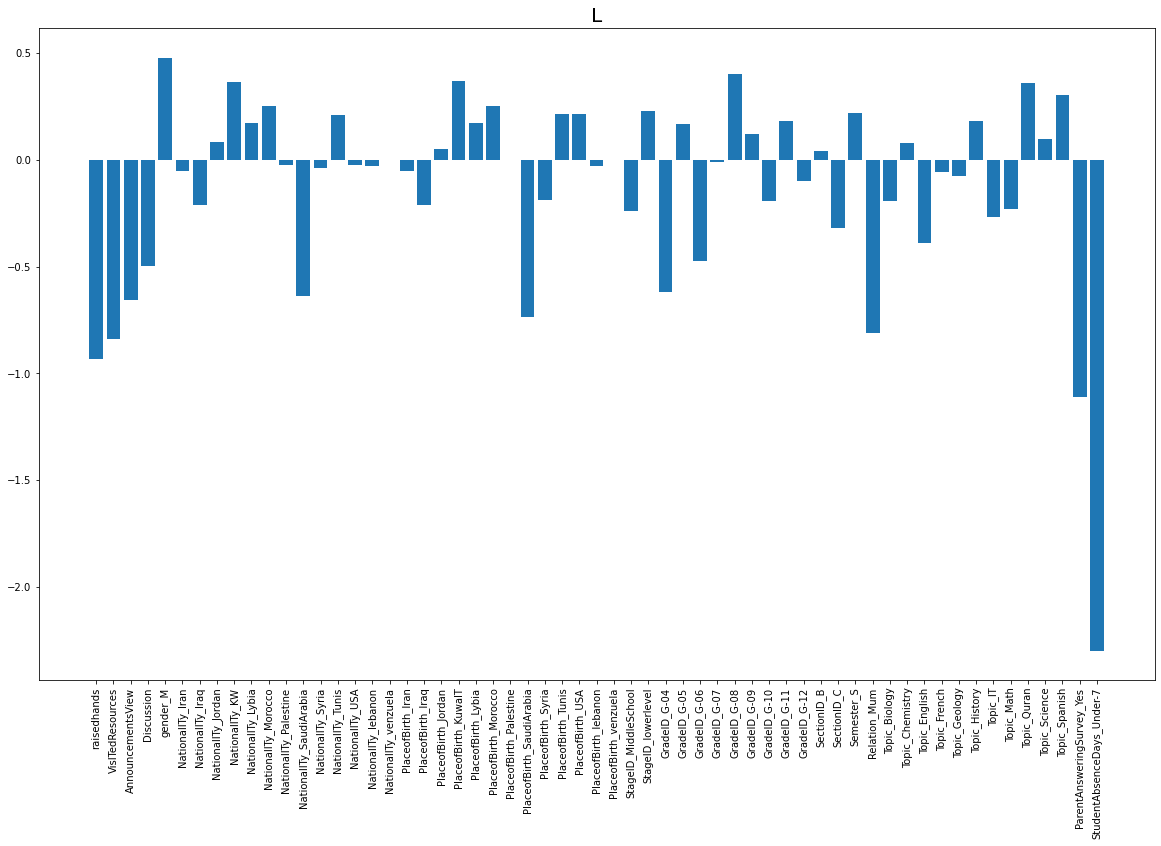

In [106]:
plt.figure(figsize=(20, 12))
plt.bar(X.columns, model_lr.coef_[1])
plt.title(model_lr.classes_[1], fontdict={'fontsize' : 20})
plt.xticks(rotation=90)
plt.show()



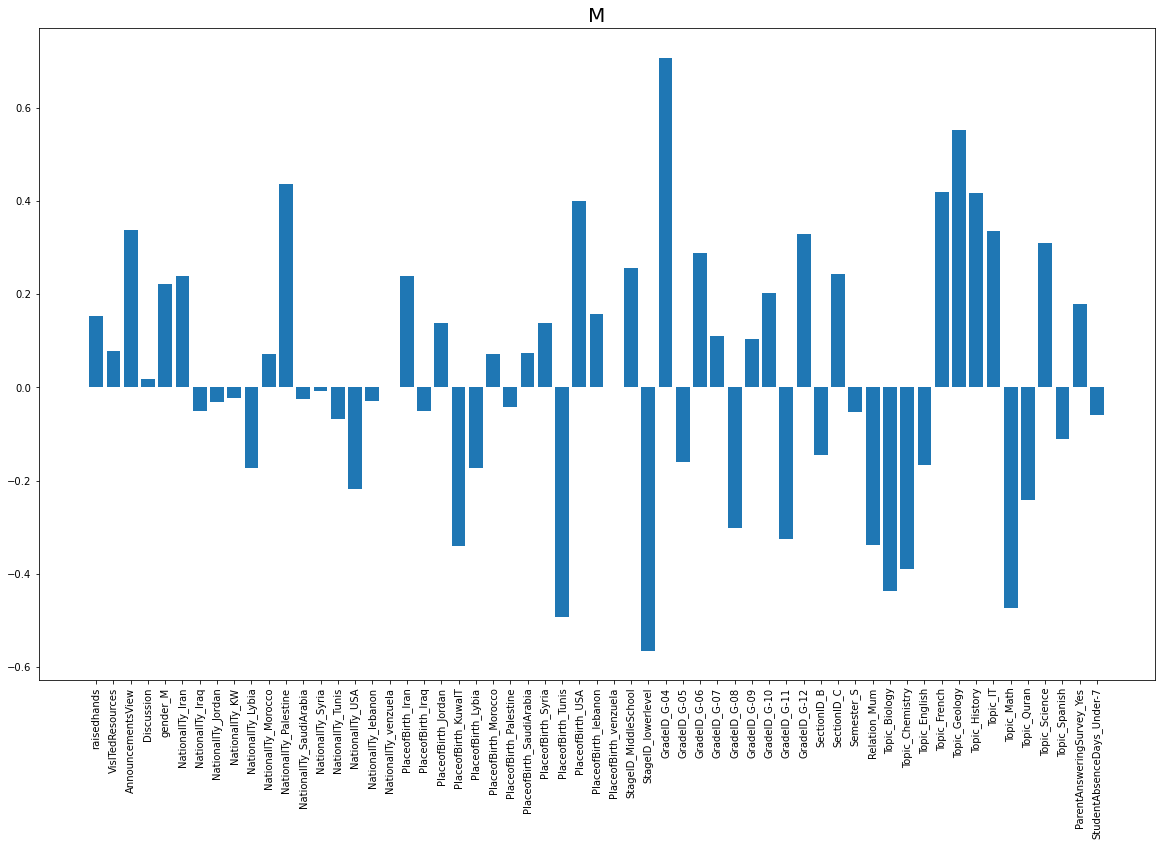

In [107]:
plt.figure(figsize=(20, 12))
plt.bar(X.columns, model_lr.coef_[2])
plt.title(model_lr.classes_[2], fontdict={'fontsize' : 20})
plt.xticks(rotation=90)
plt.show()



### 문제 15. XGBoost 모델로 특징의 중요도 확인하기

In [95]:
fi_s = pd.Series(model_xgb.feature_importances_, index=X_train.columns).sort_values() 

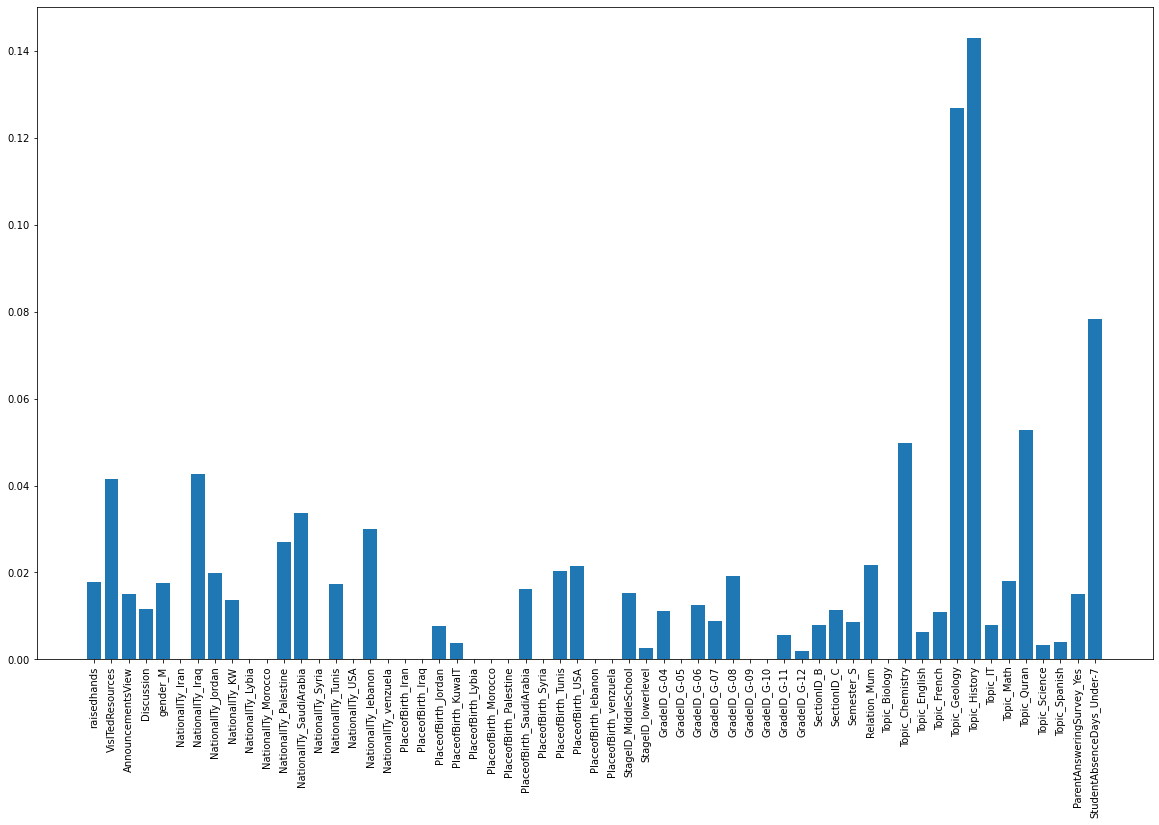

In [96]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기

fi_s = pd.Series(model_xgb.feature_importances_, index=X_train.columns).sort_values()


plt.figure(figsize=(20, 12))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(ticks=range(X_train.shape[1]),labels=model_xgb.feature_names_in_, rotation=90)
plt.show()